[View in Colaboratory](https://colab.research.google.com/github/karangautam/Learning-Samples/blob/master/Stock_Prediction.ipynb)

In [1]:
import numpy as np
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

Using TensorFlow backend.


In [2]:
!pip install quandl

    100% |████████████████████████████████| 51kB 3.5MB/s 
    100% |████████████████████████████████| 61kB 8.1MB/s 
    100% |████████████████████████████████| 2.2MB 4.3MB/s 
    100% |████████████████████████████████| 102kB 18.4MB/s 
    100% |████████████████████████████████| 430kB 15.8MB/s 
    100% |████████████████████████████████| 256kB 9.7MB/s 
  Running setup.py bdist_wheel for inflection ... - done
  Stored in directory: /content/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
  Running setup.py bdist_wheel for pycparser ... - \ done
  Stored in directory: /content/.cache/pip/wheels/c0/a1/27/5ba234bd77ea5a290cbf6d675259ec52293193467a12ef1f46
Successfully built inflection pycparser


In [0]:
import quandl

In [0]:
%matplotlib inline

In [0]:
import matplotlib

In [0]:
df= quandl.get("NSE/EICHERMOT", authtoken="obPP_aQ1Kb_VcadQf39P")

In [7]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
1998-03-20,11.30,12.20,11.3,NaN,NaN,NaN,NaN
1998-03-24,12.15,12.15,11.3,11.30,11.40,5000.0,0.58
1998-03-25,12.00,12.55,12.0,12.35,12.35,3500.0,0.43
1998-03-26,13.50,13.50,12.7,12.75,12.75,4500.0,0.58
1998-03-27,12.50,12.80,12.5,12.75,12.75,3100.0,0.40


In [0]:
df=df.dropna()

In [9]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
1998-03-24,12.15,12.15,11.3,11.30,11.40,5000.0,0.58
1998-03-25,12.00,12.55,12.0,12.35,12.35,3500.0,0.43
1998-03-26,13.50,13.50,12.7,12.75,12.75,4500.0,0.58
1998-03-27,12.50,12.80,12.5,12.75,12.75,3100.0,0.40
1998-03-30,13.00,13.20,12.5,12.50,12.70,2900.0,0.37


In [0]:
cl= df['Close']

In [11]:
cl.tail()

Date
2018-05-15    30772.85
2018-05-16    30565.70
2018-05-17    30495.95
2018-05-18    30086.20
2018-05-21    29432.90
Name: Close, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
#Scale the data
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)
cl

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


array([[1.18705381e-04],
       [1.47620794e-04],
       [1.59795705e-04],
       ...,
       [9.27985402e-01],
       [9.15513728e-01],
       [8.95629055e-01]])

In [14]:
#Create a function to process the data into 7 day look back slices
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,3)
X_train,X_test = X[:int(X.shape[0]*0.90)],X[int(X.shape[0]*0.90):]
y_train,y_test = y[:int(y.shape[0]*0.90)],y[int(y.shape[0]*0.90):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

4518
502
4518
502


In [0]:
#Build the model
model = Sequential()
model.add(LSTM(1024,input_shape=(3,1)))
#model.add(LSTM(256,return_sequences=True))
#model.add(LSTM(256))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1024)              4202496   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 4,203,521
Trainable params: 4,203,521
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),shuffle=False)

Train on 4518 samples, validate on 502 samples
Epoch 1/100
4518/4518 [==============================] - 5s 1ms/step - loss: 2.0455e-04 - val_loss: 0.0015
Epoch 2/100
4518/4518 [==============================] - 3s 683us/step - loss: 0.0016 - val_loss: 0.0115
Epoch 3/100
4518/4518 [==============================] - 3s 681us/step - loss: 0.0056 - val_loss: 0.1048
Epoch 4/100
4518/4518 [==============================] - 3s 687us/step - loss: 0.0086 - val_loss: 0.0680
Epoch 5/100
4518/4518 [==============================] - 3s 694us/step - loss: 0.0106 - val_loss: 0.2361
Epoch 6/100
2080/4518 [============>.................] - ETA: 1s - loss: 0.0060

4518/4518 [==============================] - 3s 695us/step - loss: 0.0110 - val_loss: 0.0158
Epoch 7/100
4518/4518 [==============================] - 3s 696us/step - loss: 0.0109 - val_loss: 0.0231
Epoch 8/100
4518/4518 [==============================] - 3s 691us/step - loss: 0.0112 - val_loss: 0.0094
Epoch 9/100
4518/4518 [==============================] - 3s 683us/step - loss: 0.0153 - val_loss: 0.0193
Epoch 10/100
4518/4518 [==============================] - 3s 713us/step - loss: 0.0141 - val_loss: 0.0134
Epoch 11/100
4224/4518 [===========================>..] - ETA: 0s - loss: 0.0111

4518/4518 [==============================] - 3s 711us/step - loss: 0.0123 - val_loss: 0.0976
Epoch 12/100
4518/4518 [==============================] - 3s 697us/step - loss: 0.0082 - val_loss: 0.0210
Epoch 13/100
4518/4518 [==============================] - 3s 674us/step - loss: 0.0021 - val_loss: 9.5360e-04
Epoch 14/100
4518/4518 [==============================] - 3s 677us/step - loss: 0.0011 - val_loss: 8.2790e-04
Epoch 15/100
4518/4518 [==============================] - 3s 684us/step - loss: 9.2011e-04 - val_loss: 0.0010
Epoch 16/100
4518/4518 [==============================] - 3s 685us/step - loss: 4.8325e-04 - val_loss: 0.0020
Epoch 17/100
 128/4518 [..............................] - ETA: 3s - loss: 0.0021

4518/4518 [==============================] - 3s 679us/step - loss: 1.9139e-04 - val_loss: 0.0032
Epoch 18/100
4518/4518 [==============================] - 3s 671us/step - loss: 6.8128e-05 - val_loss: 0.0036
Epoch 19/100
4518/4518 [==============================] - 3s 683us/step - loss: 3.4958e-05 - val_loss: 0.0033
Epoch 20/100
4518/4518 [==============================] - 3s 682us/step - loss: 4.0874e-05 - val_loss: 0.0026
Epoch 21/100
4518/4518 [==============================] - 3s 686us/step - loss: 5.5110e-05 - val_loss: 0.0019
Epoch 22/100
4032/4518 [=========================>....] - ETA: 0s - loss: 2.8165e-05

4518/4518 [==============================] - 3s 682us/step - loss: 6.3900e-05 - val_loss: 0.0013
Epoch 23/100
4518/4518 [==============================] - 3s 689us/step - loss: 6.5390e-05 - val_loss: 8.5419e-04
Epoch 24/100
4518/4518 [==============================] - 3s 696us/step - loss: 6.1618e-05 - val_loss: 6.2279e-04
Epoch 25/100
4518/4518 [==============================] - 3s 682us/step - loss: 5.4300e-05 - val_loss: 5.2156e-04
Epoch 26/100
4518/4518 [==============================] - 3s 686us/step - loss: 4.5902e-05 - val_loss: 4.8509e-04
Epoch 27/100
4352/4518 [===========================>..] - ETA: 0s - loss: 2.9709e-05

4518/4518 [==============================] - 3s 684us/step - loss: 3.9612e-05 - val_loss: 4.7498e-04
Epoch 28/100
4518/4518 [==============================] - 3s 694us/step - loss: 3.6517e-05 - val_loss: 4.7917e-04
Epoch 29/100
4518/4518 [==============================] - 3s 683us/step - loss: 3.5753e-05 - val_loss: 4.9358e-04
Epoch 30/100
4518/4518 [==============================] - 3s 689us/step - loss: 3.6279e-05 - val_loss: 5.1547e-04
Epoch 31/100
4518/4518 [==============================] - 3s 686us/step - loss: 3.7378e-05 - val_loss: 5.4082e-04
Epoch 32/100
4192/4518 [==========================>...] - ETA: 0s - loss: 1.2846e-05

4518/4518 [==============================] - 3s 695us/step - loss: 3.8537e-05 - val_loss: 5.6825e-04
Epoch 33/100
4518/4518 [==============================] - 3s 679us/step - loss: 3.9680e-05 - val_loss: 5.9340e-04
Epoch 34/100
4518/4518 [==============================] - 3s 689us/step - loss: 4.0467e-05 - val_loss: 6.1551e-04
Epoch 35/100
4518/4518 [==============================] - 3s 687us/step - loss: 4.1585e-05 - val_loss: 6.1786e-04
Epoch 36/100
4518/4518 [==============================] - 3s 692us/step - loss: 4.0950e-05 - val_loss: 6.1702e-04
Epoch 37/100
4000/4518 [=========================>....] - ETA: 0s - loss: 9.3742e-06

4518/4518 [==============================] - 3s 693us/step - loss: 4.3652e-05 - val_loss: 5.6151e-04
Epoch 38/100
4518/4518 [==============================] - 3s 691us/step - loss: 3.9129e-05 - val_loss: 5.3900e-04
Epoch 39/100
4518/4518 [==============================] - 3s 686us/step - loss: 4.6927e-05 - val_loss: 4.1910e-04
Epoch 40/100
4518/4518 [==============================] - 3s 703us/step - loss: 3.8946e-05 - val_loss: 4.2187e-04
Epoch 41/100
4518/4518 [==============================] - 3s 696us/step - loss: 4.8817e-05 - val_loss: 3.9616e-04
Epoch 42/100
3424/4518 [=====================>........] - ETA: 0s - loss: 3.0076e-06

4518/4518 [==============================] - 3s 696us/step - loss: 4.2446e-05 - val_loss: 4.0041e-04
Epoch 43/100
4518/4518 [==============================] - 3s 675us/step - loss: 5.5078e-05 - val_loss: 4.9934e-04
Epoch 44/100
4518/4518 [==============================] - 3s 687us/step - loss: 4.6669e-05 - val_loss: 5.0259e-04
Epoch 45/100
4518/4518 [==============================] - 3s 695us/step - loss: 1.0513e-04 - val_loss: 6.5224e-04
Epoch 46/100
4518/4518 [==============================] - 3s 690us/step - loss: 1.0113e-04 - val_loss: 0.0017
Epoch 47/100
3968/4518 [=========================>....] - ETA: 0s - loss: 4.1337e-04

4518/4518 [==============================] - 3s 706us/step - loss: 3.9815e-04 - val_loss: 5.9392e-04
Epoch 48/100
4518/4518 [==============================] - 3s 684us/step - loss: 1.4191e-04 - val_loss: 3.8041e-04
Epoch 49/100
4518/4518 [==============================] - 3s 700us/step - loss: 6.7800e-05 - val_loss: 3.9832e-04
Epoch 50/100
4518/4518 [==============================] - 3s 699us/step - loss: 5.8616e-05 - val_loss: 4.0137e-04
Epoch 51/100
4518/4518 [==============================] - 3s 691us/step - loss: 6.0770e-05 - val_loss: 4.1944e-04
Epoch 52/100
4128/4518 [==========================>...] - ETA: 0s - loss: 1.4363e-05

4518/4518 [==============================] - 3s 692us/step - loss: 5.5451e-05 - val_loss: 4.1740e-04
Epoch 53/100
4518/4518 [==============================] - 3s 683us/step - loss: 5.6840e-05 - val_loss: 4.3330e-04
Epoch 54/100
4518/4518 [==============================] - 3s 681us/step - loss: 5.1223e-05 - val_loss: 4.2189e-04
Epoch 55/100
4518/4518 [==============================] - 3s 683us/step - loss: 5.5072e-05 - val_loss: 4.4302e-04
Epoch 56/100
4518/4518 [==============================] - 3s 696us/step - loss: 4.7016e-05 - val_loss: 4.1855e-04
Epoch 57/100
4224/4518 [===========================>..] - ETA: 0s - loss: 1.8146e-05

4518/4518 [==============================] - 3s 683us/step - loss: 6.0062e-05 - val_loss: 4.7117e-04
Epoch 58/100
4518/4518 [==============================] - 3s 691us/step - loss: 4.5045e-05 - val_loss: 5.7120e-04
Epoch 59/100
4518/4518 [==============================] - 3s 690us/step - loss: 1.0070e-04 - val_loss: 6.2328e-04
Epoch 60/100
4518/4518 [==============================] - 3s 678us/step - loss: 8.1740e-05 - val_loss: 0.0019
Epoch 61/100
4518/4518 [==============================] - 3s 675us/step - loss: 2.7280e-04 - val_loss: 3.8545e-04
Epoch 62/100
4448/4518 [============================>.] - ETA: 0s - loss: 4.8407e-05

4518/4518 [==============================] - 3s 678us/step - loss: 5.2347e-05 - val_loss: 3.9562e-04
Epoch 63/100
4518/4518 [==============================] - 3s 692us/step - loss: 4.9433e-05 - val_loss: 4.5143e-04
Epoch 64/100
4518/4518 [==============================] - 3s 695us/step - loss: 6.0090e-05 - val_loss: 4.4503e-04
Epoch 65/100
4518/4518 [==============================] - 3s 690us/step - loss: 6.6238e-05 - val_loss: 4.1298e-04
Epoch 66/100
4518/4518 [==============================] - 3s 686us/step - loss: 6.5046e-05 - val_loss: 4.0216e-04
Epoch 67/100
4096/4518 [==========================>...] - ETA: 0s - loss: 2.8238e-05

4518/4518 [==============================] - 3s 686us/step - loss: 6.5589e-05 - val_loss: 3.9883e-04
Epoch 68/100
4518/4518 [==============================] - 3s 681us/step - loss: 6.7322e-05 - val_loss: 3.9457e-04
Epoch 69/100
4518/4518 [==============================] - 3s 680us/step - loss: 6.8334e-05 - val_loss: 3.9228e-04
Epoch 70/100
4518/4518 [==============================] - 3s 674us/step - loss: 6.9279e-05 - val_loss: 3.9212e-04
Epoch 71/100
4518/4518 [==============================] - 3s 696us/step - loss: 7.0514e-05 - val_loss: 3.9295e-04
Epoch 72/100
4128/4518 [==========================>...] - ETA: 0s - loss: 3.9028e-05

4518/4518 [==============================] - 3s 683us/step - loss: 7.1889e-05 - val_loss: 3.9313e-04
Epoch 73/100
4518/4518 [==============================] - 3s 683us/step - loss: 7.3017e-05 - val_loss: 3.8897e-04
Epoch 74/100
4518/4518 [==============================] - 3s 684us/step - loss: 7.2591e-05 - val_loss: 3.9107e-04
Epoch 75/100
4518/4518 [==============================] - 3s 681us/step - loss: 7.2571e-05 - val_loss: 3.8613e-04
Epoch 76/100
4518/4518 [==============================] - 3s 692us/step - loss: 7.2749e-05 - val_loss: 3.6617e-04
Epoch 77/100
4032/4518 [=========================>....] - ETA: 0s - loss: 3.2522e-05

4518/4518 [==============================] - 3s 693us/step - loss: 6.8431e-05 - val_loss: 3.5721e-04
Epoch 78/100
4518/4518 [==============================] - 3s 692us/step - loss: 6.0984e-05 - val_loss: 3.7510e-04
Epoch 79/100
4518/4518 [==============================] - 3s 686us/step - loss: 6.5838e-05 - val_loss: 3.6856e-04
Epoch 80/100
4518/4518 [==============================] - 3s 690us/step - loss: 6.1449e-05 - val_loss: 3.8491e-04
Epoch 81/100
4518/4518 [==============================] - 3s 711us/step - loss: 6.4673e-05 - val_loss: 3.6477e-04
Epoch 82/100
3872/4518 [========================>.....] - ETA: 0s - loss: 2.6226e-05

4518/4518 [==============================] - 3s 701us/step - loss: 5.9994e-05 - val_loss: 3.6564e-04
Epoch 83/100
4518/4518 [==============================] - 3s 684us/step - loss: 6.0776e-05 - val_loss: 3.5720e-04
Epoch 84/100
4518/4518 [==============================] - 3s 698us/step - loss: 6.0360e-05 - val_loss: 3.4233e-04
Epoch 85/100
4518/4518 [==============================] - 3s 690us/step - loss: 4.8624e-05 - val_loss: 3.4747e-04
Epoch 86/100
4518/4518 [==============================] - 3s 676us/step - loss: 4.8365e-05 - val_loss: 3.5856e-04
Epoch 87/100
4128/4518 [==========================>...] - ETA: 0s - loss: 1.7433e-05

4518/4518 [==============================] - 3s 682us/step - loss: 5.3670e-05 - val_loss: 3.3494e-04
Epoch 88/100
4518/4518 [==============================] - 3s 689us/step - loss: 4.5540e-05 - val_loss: 3.4765e-04
Epoch 89/100
4518/4518 [==============================] - 3s 690us/step - loss: 5.1888e-05 - val_loss: 3.3872e-04
Epoch 90/100
4518/4518 [==============================] - 3s 688us/step - loss: 4.5328e-05 - val_loss: 3.5229e-04
Epoch 91/100
4518/4518 [==============================] - 3s 693us/step - loss: 5.1559e-05 - val_loss: 3.7681e-04
Epoch 92/100
4128/4518 [==========================>...] - ETA: 0s - loss: 7.2751e-06

4518/4518 [==============================] - 3s 685us/step - loss: 4.9794e-05 - val_loss: 4.3804e-04
Epoch 93/100
4518/4518 [==============================] - 3s 690us/step - loss: 4.3719e-05 - val_loss: 4.4806e-04
Epoch 94/100
4518/4518 [==============================] - 3s 684us/step - loss: 5.5021e-05 - val_loss: 4.3428e-04
Epoch 95/100
4518/4518 [==============================] - 3s 682us/step - loss: 4.8861e-05 - val_loss: 5.0663e-04
Epoch 96/100
4518/4518 [==============================] - 3s 683us/step - loss: 4.1021e-05 - val_loss: 0.0024
Epoch 97/100
4352/4518 [===========================>..] - ETA: 0s - loss: 9.5782e-05

4518/4518 [==============================] - 3s 688us/step - loss: 1.3069e-04 - val_loss: 4.9070e-04
Epoch 98/100
4518/4518 [==============================] - 3s 701us/step - loss: 9.9909e-05 - val_loss: 0.0042
Epoch 99/100
4518/4518 [==============================] - 3s 686us/step - loss: 4.1668e-04 - val_loss: 0.0041
Epoch 100/100
4518/4518 [==============================] - 3s 688us/step - loss: 4.5792e-04 - val_loss: 5.2731e-04


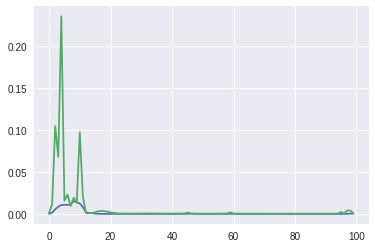

In [18]:
matplotlib.pyplot.plot(history.history['loss'])
matplotlib.pyplot.plot(history.history['val_loss'])

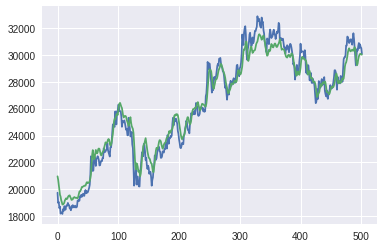

In [19]:
Xt = model.predict(X_test)
matplotlib.pyplot.plot(scl.inverse_transform(y_test.reshape(-1,1)))
matplotlib.pyplot.plot(scl.inverse_transform(Xt))

In [20]:
act = []
pred = []
#for i in range(250):
i=249
Xt = model.predict(X_test[i].reshape(1,3,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[28632.332]], actual:[[28930.6]]


In [0]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

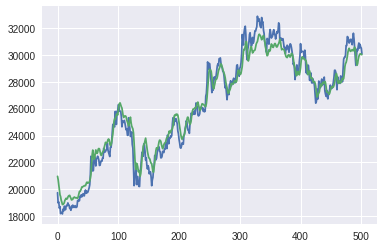

In [22]:
Xt = model.predict(X_test)
matplotlib.pyplot.plot(scl.inverse_transform(y_test.reshape(-1,1)))
matplotlib.pyplot.plot(scl.inverse_transform(Xt))
